# IMPORT REQUIRED LIBRARIES

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler 



In [51]:
df = pd.read_csv('../Dataset/magic04.data')

In [52]:
cols = ["fLength","fWidth","fsize","fConc","fConc1","fAsym","fM3Long","fM3Trans","fAlpha","fDist","class"]
df = pd.read_csv(r"../Dataset/magic04.data",names=cols)
df.head(5)



,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [53]:
len(df)

19020

In [54]:
df["class"] = (df["class"]=='g').astype(int)

In [55]:
df.head(5)

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


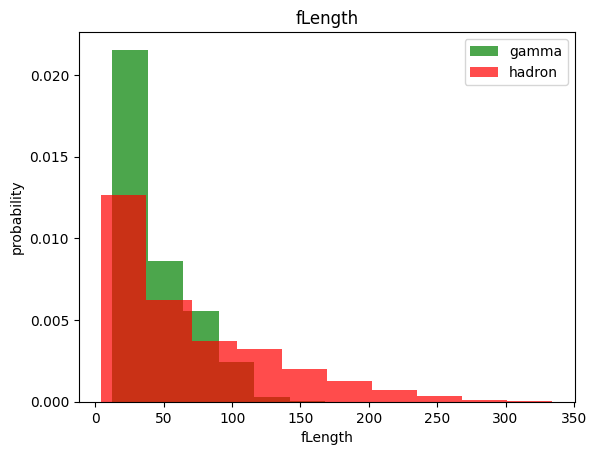

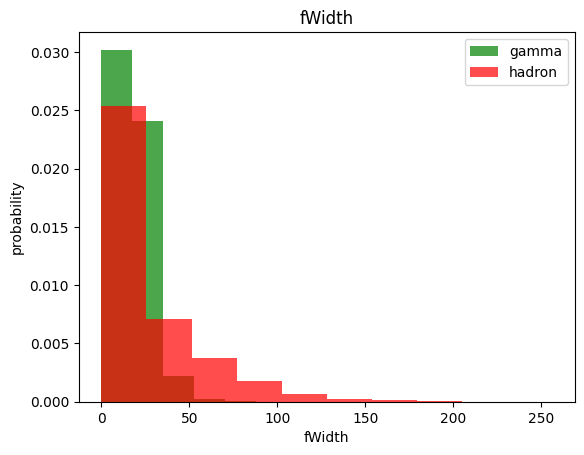

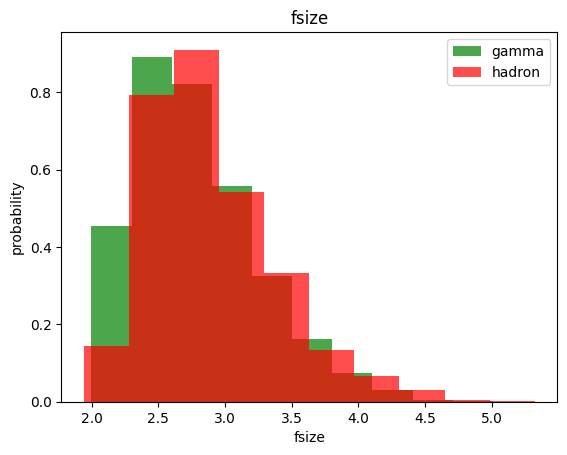

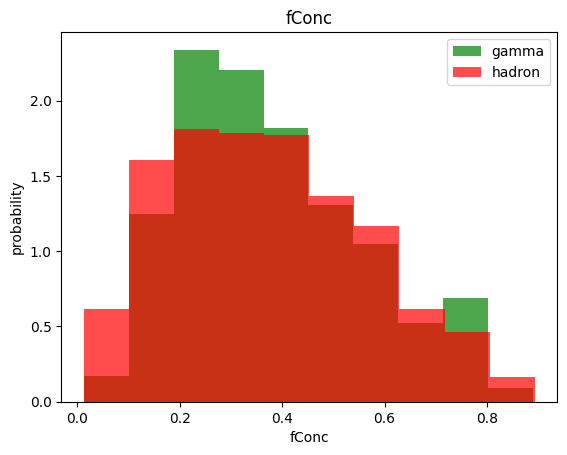

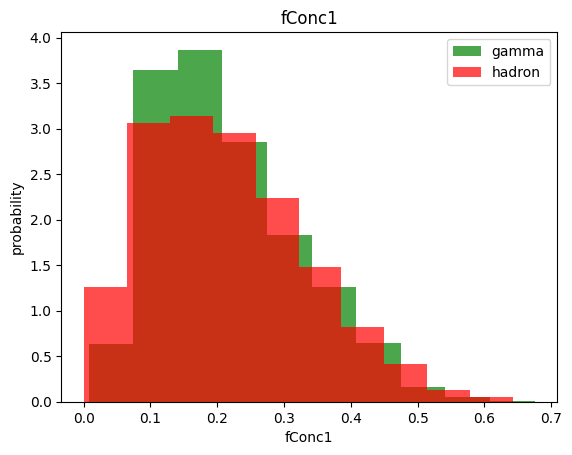

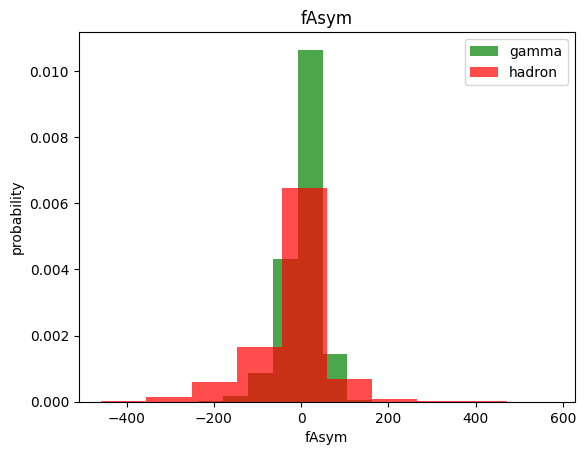

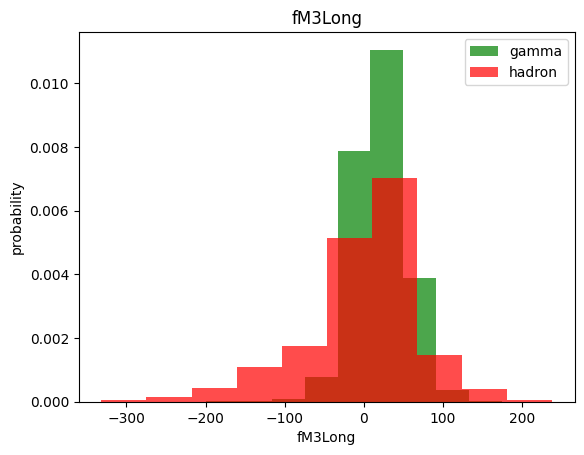

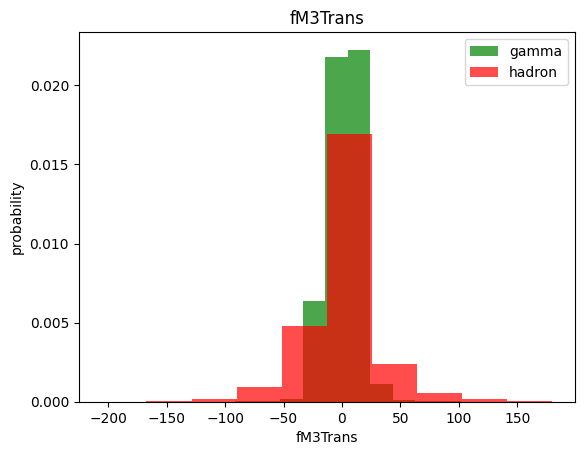

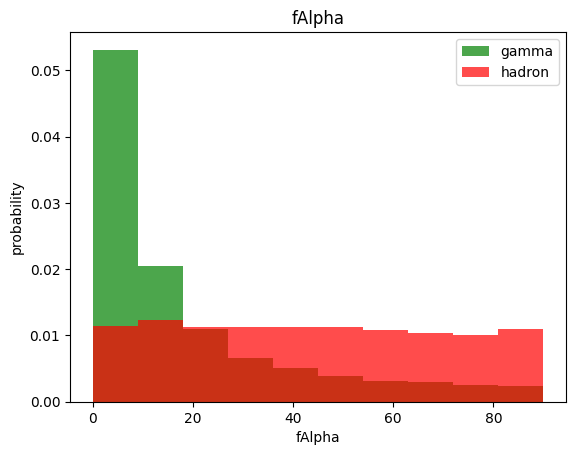

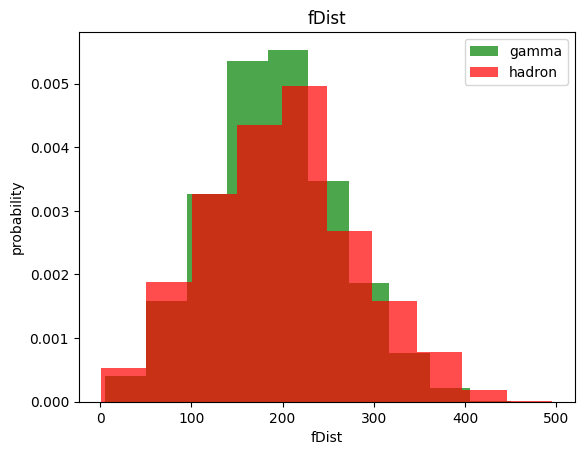

In [56]:
for label in cols[:-1]:
    plt.hist(df[df["class"]==1][label],color='green',label='gamma',alpha=0.7,density=True)
    plt.hist(df[df["class"]==0][label],color='red',alpha=0.7,label='hadron',density=True)
    plt.title(label)
    plt.ylabel('probability')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [57]:
train,valid,test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [58]:
print(len(train))
print(len(valid))
print(len(test))

11412
3804
3804


In [59]:
train.head(5)

,fLength,fWidth,fsize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
15825,18.0345,9.8637,2.3464,0.6486,0.4302,-18.3739,-13.9722,-2.1193,86.9053,135.282,0
3083,13.1625,10.4977,2.1658,0.7850,0.4812,-13.3254,-5.2619,-10.6896,40.3160,184.880,1
6343,72.2842,22.0030,2.7631,0.2778,0.1665,-48.6834,33.3607,22.8024,2.3710,313.163,1
10406,22.5867,14.5376,2.3170,0.4916,0.2964,-31.6634,16.1668,-4.3830,48.7510,244.633,1
8343,18.5143,15.6550,2.3253,0.5248,0.3002,6.4237,-16.6093,-10.8866,86.0763,211.161,1


In [60]:
def scale_dataset(dataframe,oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)

    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1))))

    return data , X,y

    

In [61]:
train , X_train , y_train = scale_dataset(train,oversample=True)
valid , X_valid , y_valid = scale_dataset(valid,oversample=False)
test , X_test , y_test = scale_dataset(test,oversample=False)

In [62]:
len(train)

14868

In [63]:
len(X_train)

14868

In [64]:
len(y_train)

14868

In [65]:
sum(y_train == 0)

7434

In [66]:
sum(y_train == 1)

7434

# MODEL BUILDING USING kNN Classifer

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [68]:
kNN_Model = KNeighborsClassifier(n_neighbors=1)
kNN_Model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [69]:
y_pred = kNN_Model.predict(X_test)

In [70]:
y_pred

array([0, 1, 1, ..., 1, 0, 1])

In [71]:
y_test

array([0, 1, 1, ..., 1, 0, 1])

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.68      0.73      1367
           1       0.83      0.90      0.86      2437

    accuracy                           0.82      3804
   macro avg       0.81      0.79      0.80      3804
weighted avg       0.82      0.82      0.82      3804



# Navie Bayes

In [73]:
from sklearn.naive_bayes import GaussianNB

In [74]:
nb_model = GaussianNB()

In [75]:
nb_model.fit(X_train,y_train)

GaussianNB()

In [76]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1367
           1       0.73      0.90      0.81      2437

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# Logistic Regression

In [77]:
from sklearn.linear_model import LogisticRegression

In [78]:
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train,y_train)

In [79]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.69      0.40      0.51      1367
           1       0.73      0.90      0.81      2437

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.72      0.72      0.70      3804



# SVM - Support Vector Machines

In [80]:
from sklearn.svm import SVC

In [81]:
svm_model = SVC()
svm_model = svm_model.fit(X_train, y_train)

In [82]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1367
           1       0.89      0.89      0.89      2437

    accuracy                           0.86      3804
   macro avg       0.84      0.84      0.84      3804
weighted avg       0.86      0.86      0.86      3804



# Importing Required module of Deeplearning Techniques

## Tensorflow/Keras - framework(module) , version 2 

In [83]:
import tensorflow as tf

In [84]:
def plot_loss(history):
    plt.plot(history.history['loss'],label = 'loss')
    plt.plot(history.history['val_loss'],label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Binary Crossentropy')
    plt.legend()
    plt.grid(True)
    plt.show()


def plot_accuracy(history):
    plt.plot(history.history['accuracy'],label='accuracy')
    plt.plot(history.history['val_accuracy'],label='val_accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.show()

In [85]:
nn_model = tf.keras.Sequential([
    tf.keras.layers.Dense(32,activation='relu',input_shape =(10,)),
    tf.keras.layers.Dense(32,activation='relu'),
    tf.keras.layers.Dense(1,activation = 'sigmoid')
])

In [86]:
nn_model.compile(optimizer=tf.keras.optimizers.Adam(0.001),loss='binary_crossentropy',
                        metrics=['accuracy'])

In [87]:
history = nn_model.fit(X_train,y_train,epochs=100,batch_size=32,validation_split=0.2,
                            verbose=0)

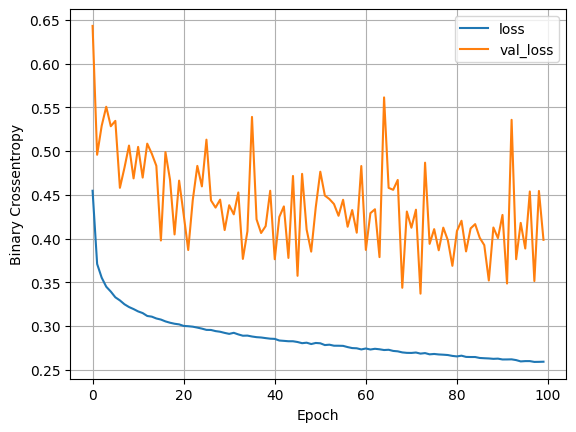

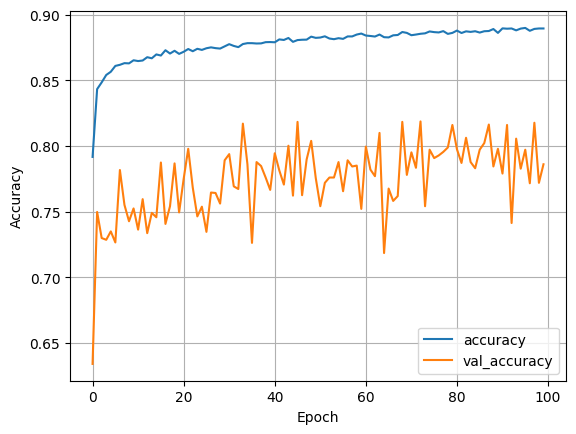

In [88]:
plot_loss(history)
plot_accuracy(history)

# Apporach 2 using all layers of CNN - Convolution Neural Networks

## CNN 

In [89]:
def train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs):
    cnn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes,activation='relu',input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes,activation='relu'),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1,activation='sigmoid')
    ])

    cnn_model.compile(optimizer=tf.keras.optimizers.Adam(lr),loss='binary_crossentropy',
                            metrics=['accuracy'])
    history = cnn_model.fit(X_train,y_train,epochs=epochs,batch_size=batch_size,validation_split=0.2,
                                    verbose=0)

    return cnn_model,history

## plot the history - Loss and Accuracy

In [92]:
def plot_history(history):
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(6,12))
    ax1.plot(history.history['loss'],label='loss')
    ax1.plot(history.history['val_loss'],label='val_loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Binary Crossentropy')
    ax1.legend()
    ax1.grid(True)

    ax2.plot(history.history['accuracy'],label='accuracy')
    ax2.plot(history.history['val_accuracy'],label='val_accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    ax2.grid(True)

    plt.show()
    


16 nodes,dropout0,lr0.01


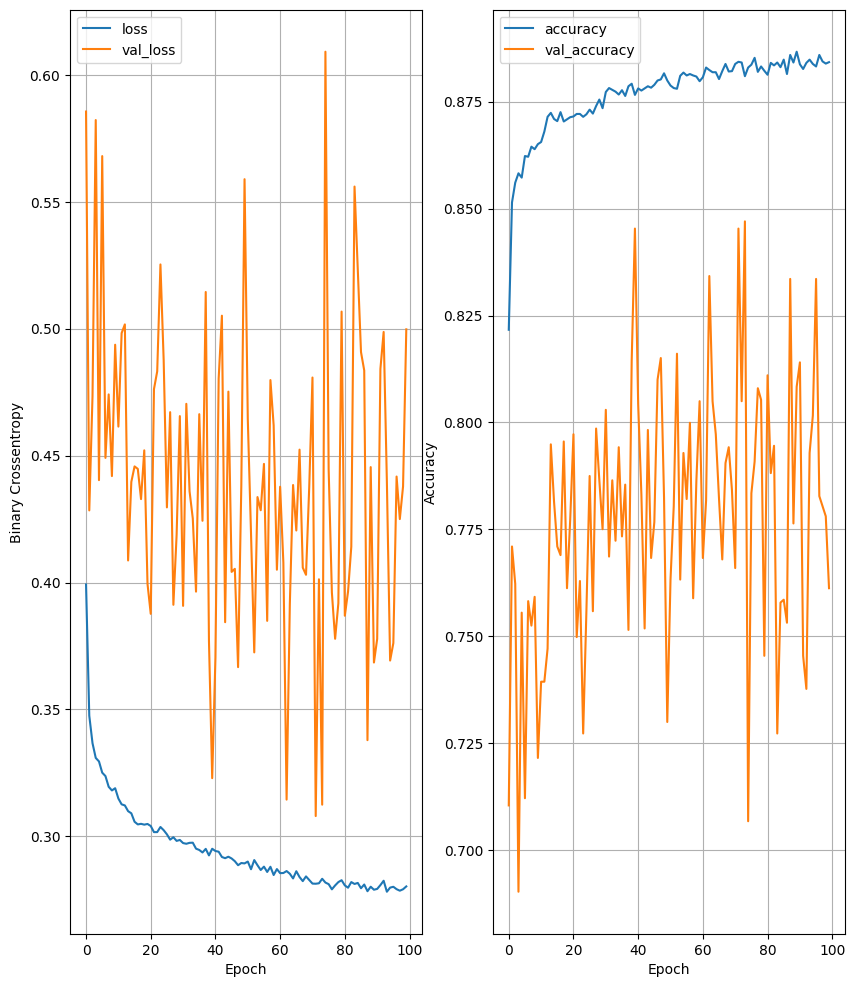

119/119 [==============================] - 0s 1ms/step - loss: 0.3442 - accuracy: 0.8594
16 nodes,dropout0,lr0.01


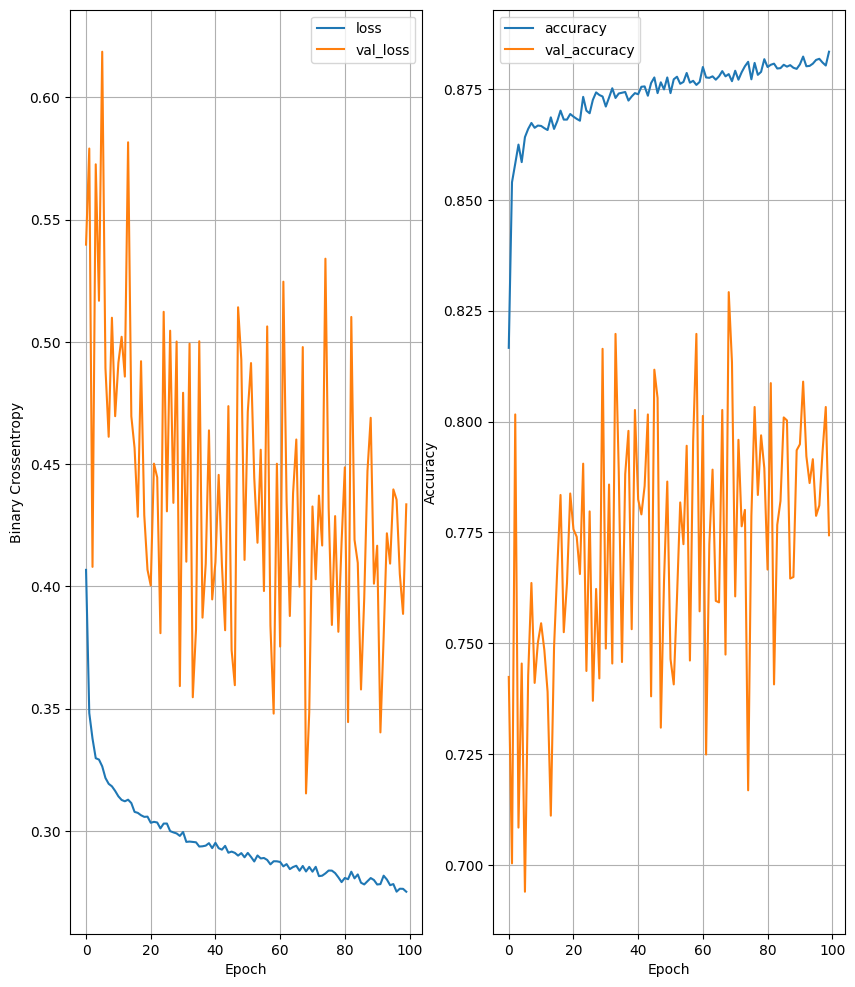

119/119 [==============================] - 0s 1ms/step - loss: 0.3151 - accuracy: 0.8670
16 nodes,dropout0,lr0.01


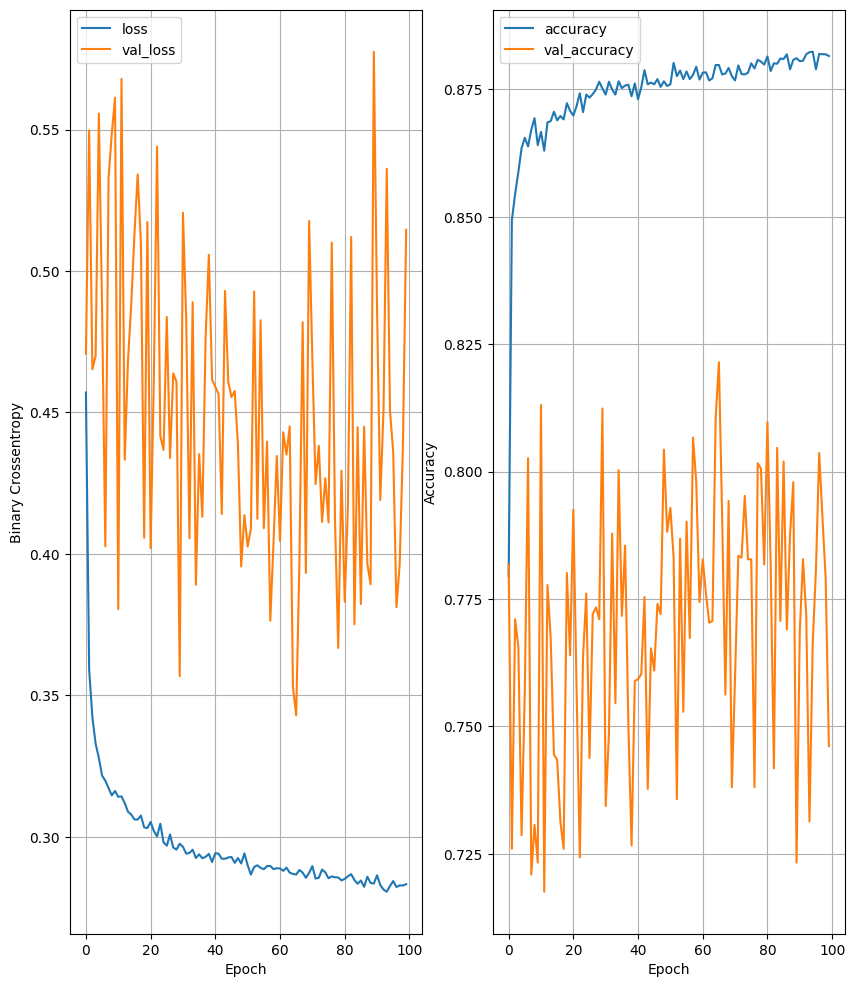

119/119 [==============================] - 0s 1ms/step - loss: 0.3198 - accuracy: 0.8730
16 nodes,dropout0,lr0.005


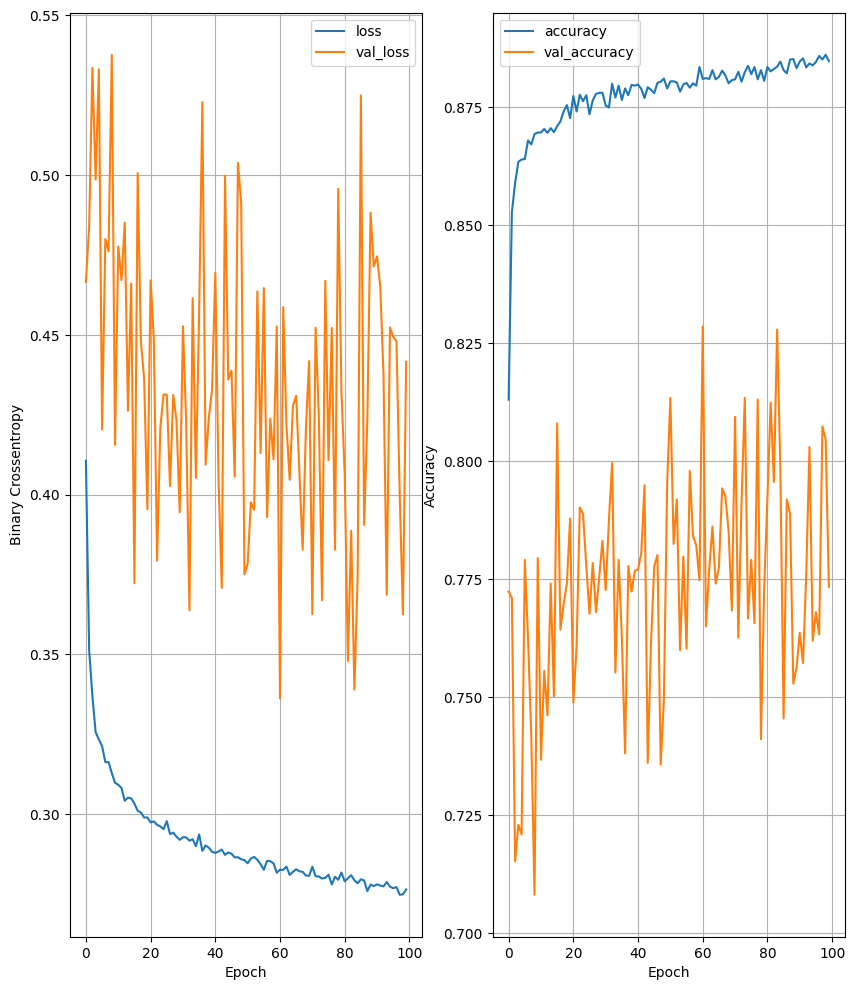

119/119 [==============================] - 0s 2ms/step - loss: 0.3126 - accuracy: 0.8680
16 nodes,dropout0,lr0.005


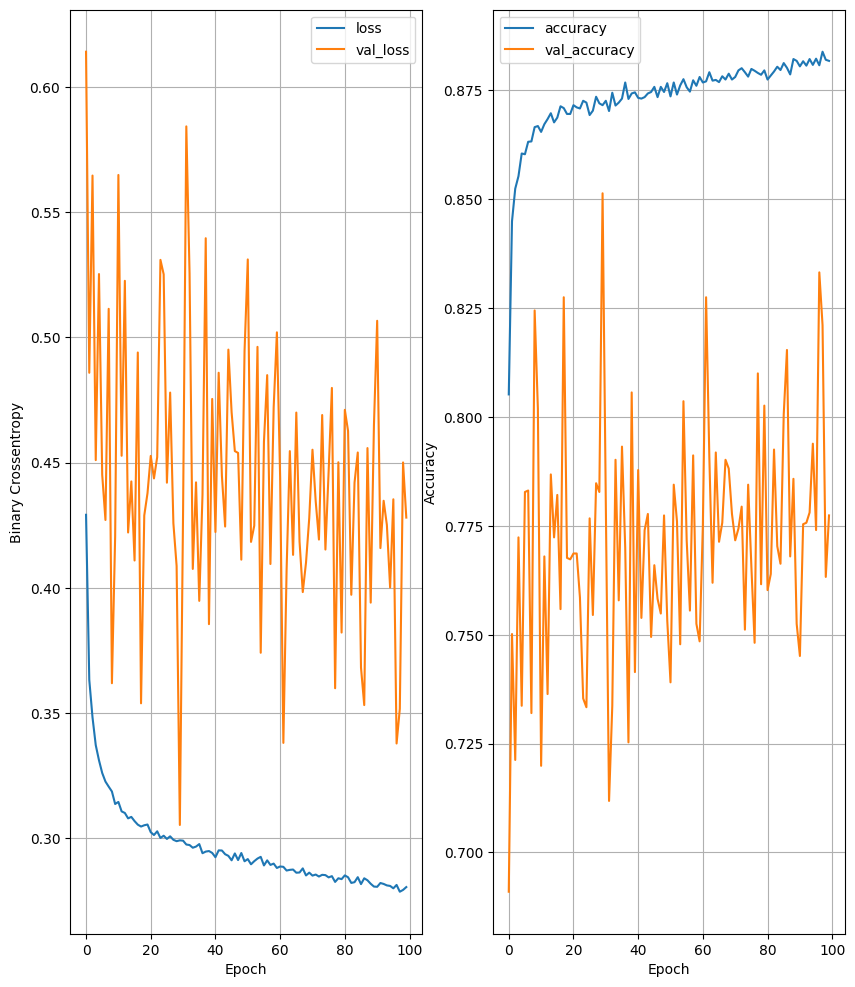

119/119 [==============================] - 0s 1ms/step - loss: 0.3154 - accuracy: 0.8701
16 nodes,dropout0,lr0.005


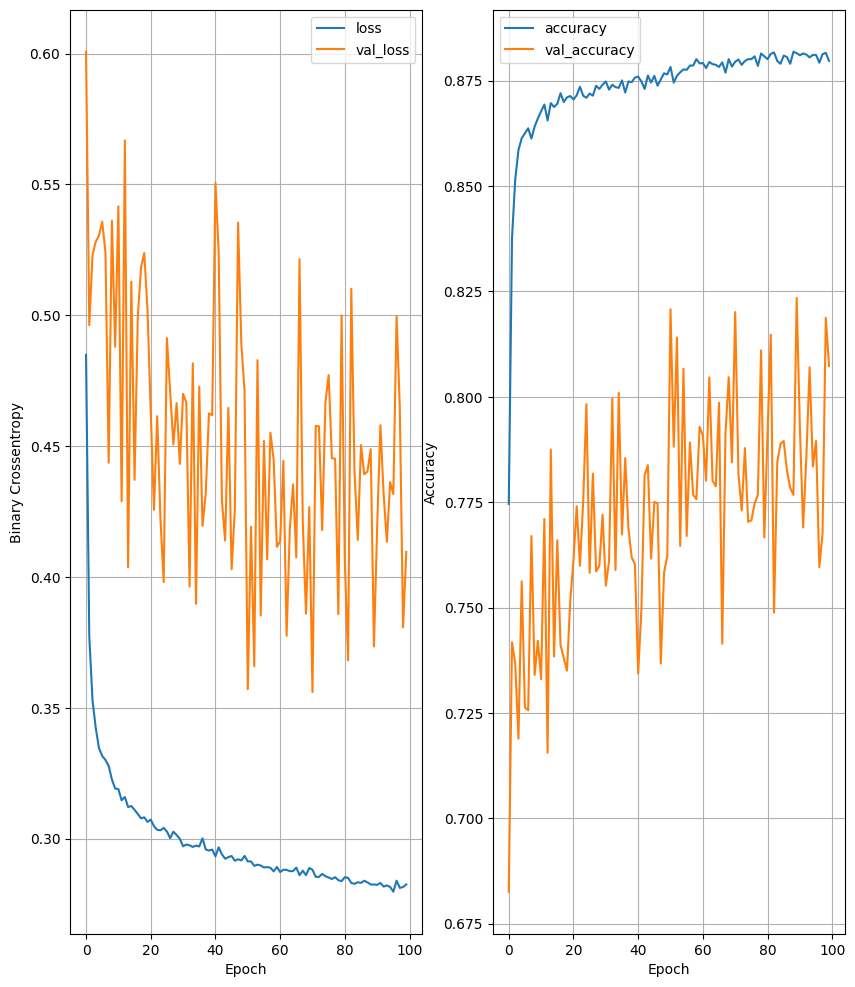

119/119 [==============================] - 0s 1ms/step - loss: 0.3145 - accuracy: 0.8678
16 nodes,dropout0,lr0.001


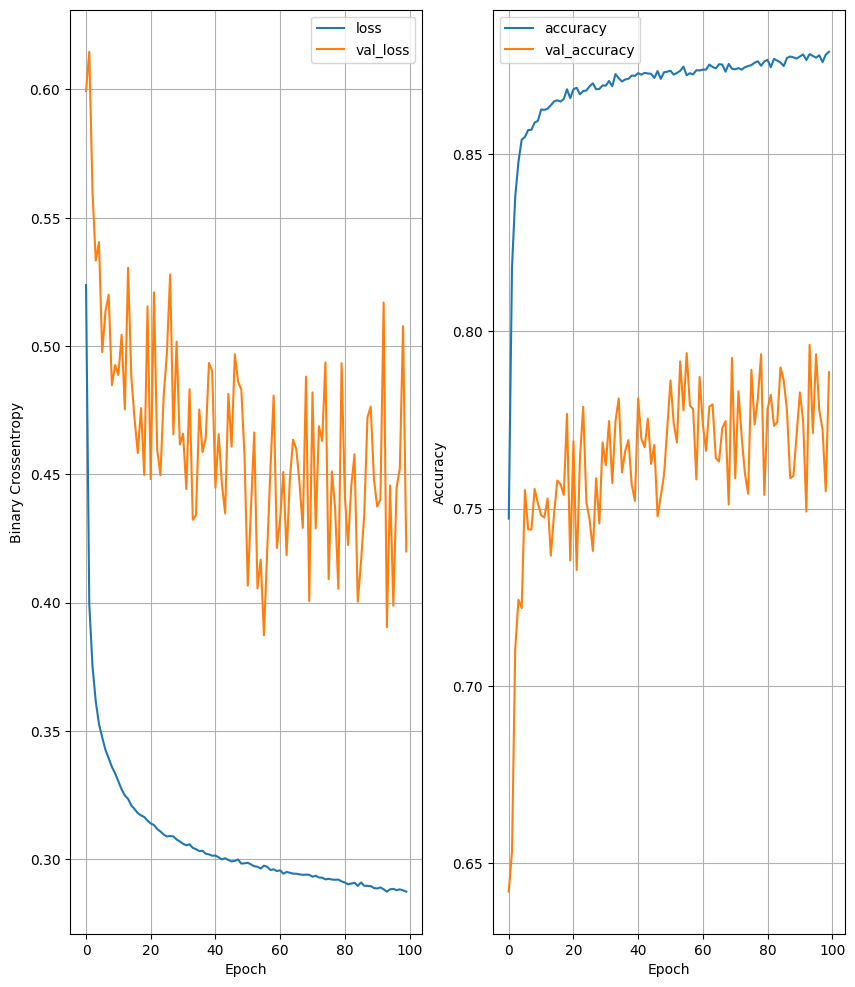

119/119 [==============================] - 0s 1ms/step - loss: 0.3069 - accuracy: 0.8733
16 nodes,dropout0,lr0.001


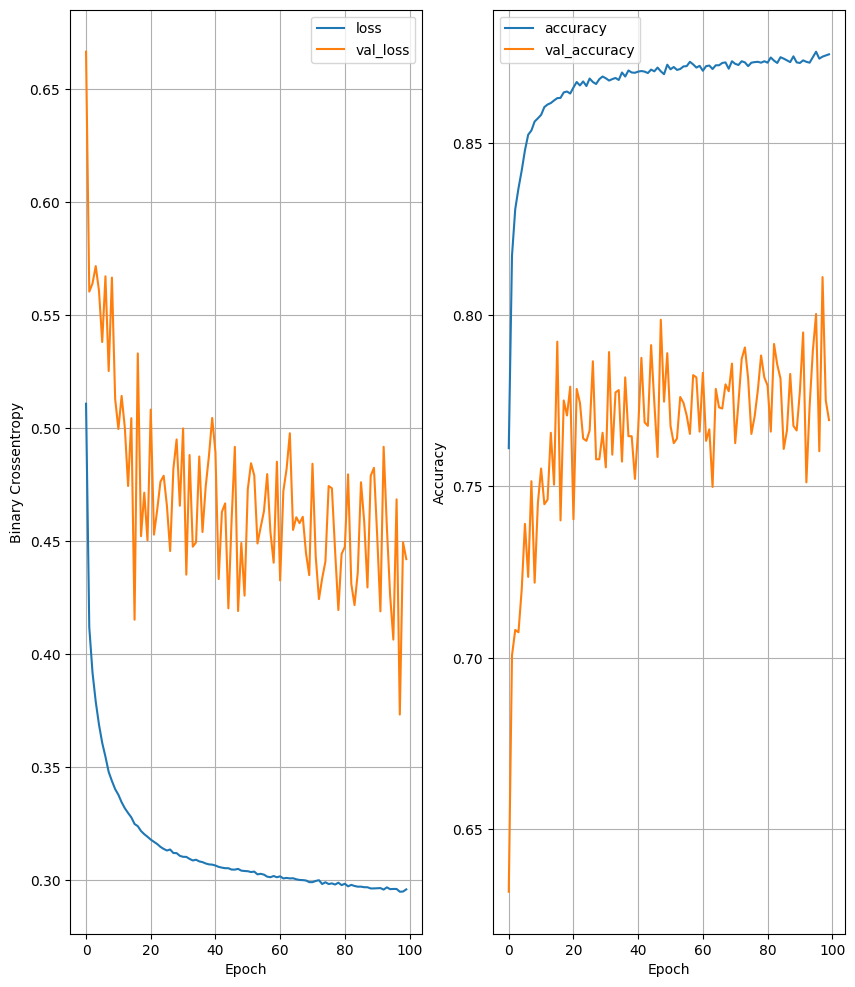

119/119 [==============================] - 0s 2ms/step - loss: 0.3100 - accuracy: 0.8717
16 nodes,dropout0,lr0.001


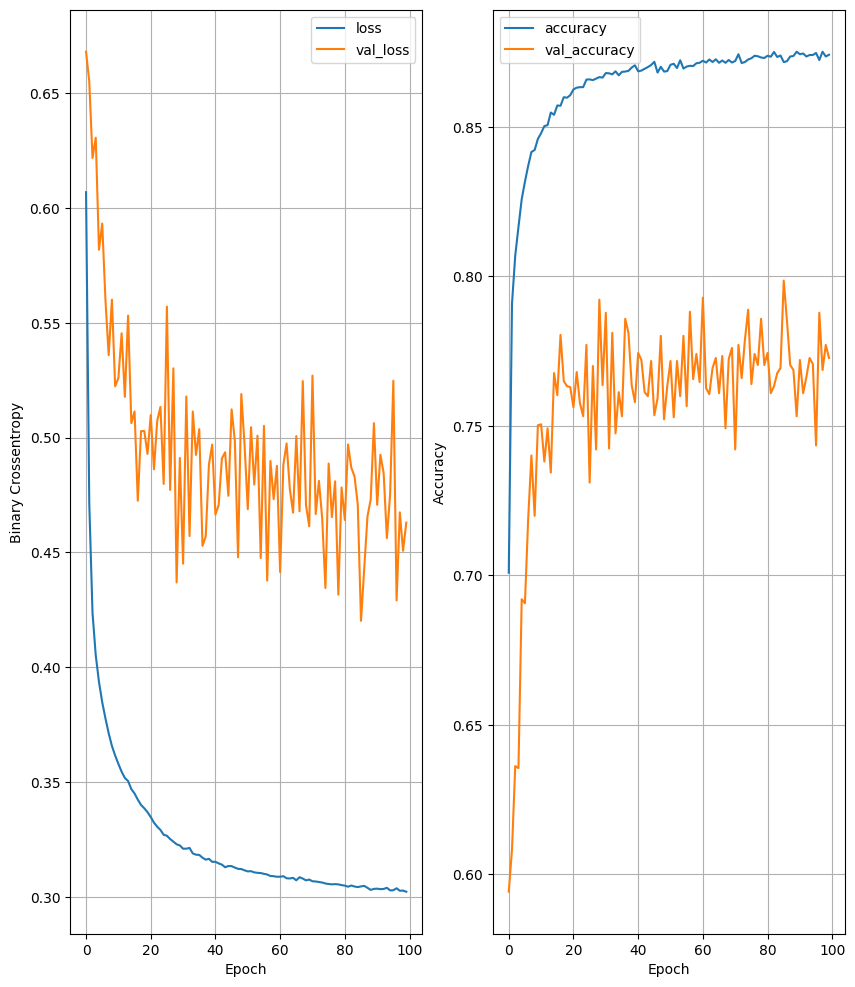

119/119 [==============================] - 0s 2ms/step - loss: 0.3054 - accuracy: 0.8707
16 nodes,dropout0.2,lr0.01


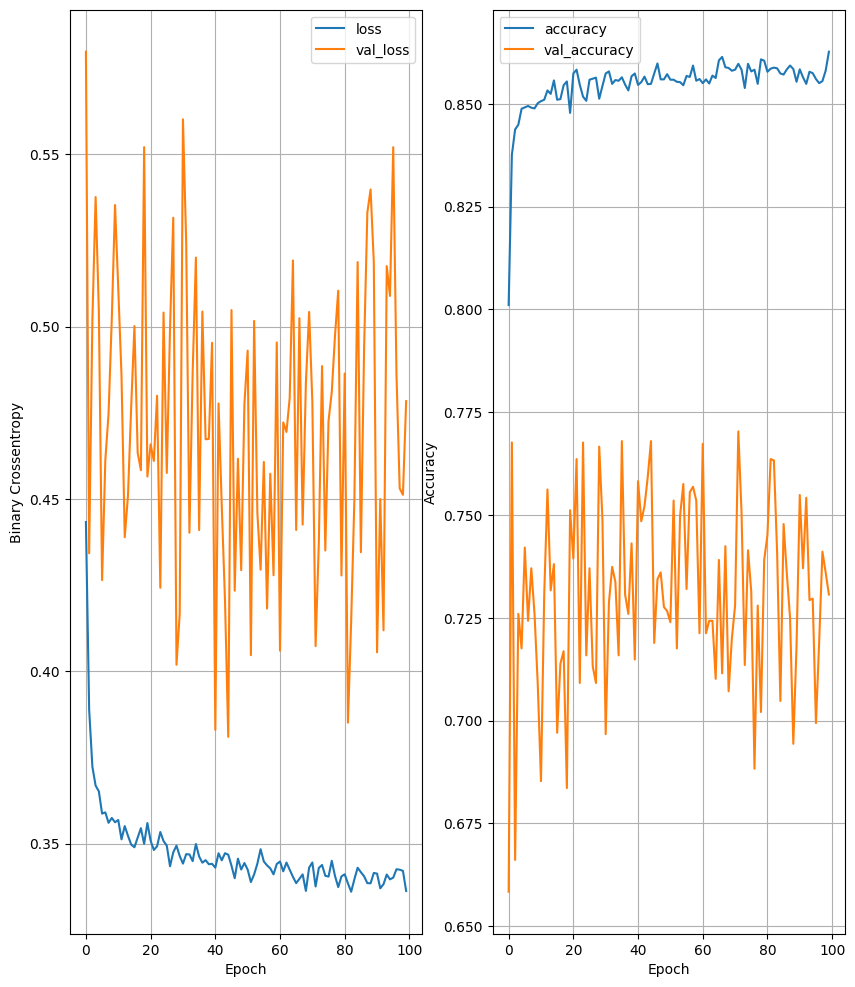

119/119 [==============================] - 0s 1ms/step - loss: 0.3212 - accuracy: 0.8641
16 nodes,dropout0.2,lr0.01


In [93]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [16,32,64]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes} nodes,dropout{dropout_prob},lr{lr},batchsize{batch_size}")
                model,history = train_model(X_train,y_train,num_nodes,dropout_prob,lr,batch_size,epochs)
                plot_history(history)
                val_loss=model.evaluate(X_valid,y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model
